#### [Chapter 7](https://github.com/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_07.ipynb)
<!-- - [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Ziaeemehr/mndynamics/main?labpath=mndynamics%2Fexamples%2FChap_07.ipynb) -->

**Linear Integrate-and-Fire (LIF) Neurons**

- Börgers, C., 2017. An introduction to modeling neuronal dynamics (Vol. 66). Berlin: Springer.

Code by : Abolfazl Ziaeemehr 
- https://github.com/Ziaeemehr

<a href="https://colab.research.google.com/github/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# uncomment and run this line to install the package in colab
# !pip install "git+https://github.com/Ziaeemehr/mndynamics.git"

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mndynamics.models.py.HH_Base import HH
from mndynamics.models.py.LIF_Base import LIF

In [2]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['k', 'g', 'b', 'y'])
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['font.size'] = 16

In [3]:
obj = HH()
obj()

Hudgkin Huxley Model


{'c': 1.0,
 'g_k': 36.0,
 'g_na': 120.0,
 'g_l': 0.3,
 'v_k': -82.0,
 'v_na': 45.0,
 'v_l': -59.0,
 'i_ext': 7.0,
 't_end': 50.0,
 'v0': -70.0,
 'dt': 0.01}

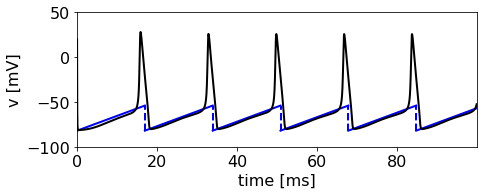

In [4]:
plt.figure(figsize=(7, 3))

v = np.asarray([-82.0, -54.0])
t = np.asarray([0.0, (v[1] - v[0]) / 1.65])
plt.plot(t, v, c="b", lw=2)

for i in range(1, 6):
    plt.plot(t + t[1] * i, v, c="b", lw=2)
    plt.plot([(i)*t[1], (i)*t[1]], v, c="b", lw=2, ls="--")


obj = HH({"v0": 20.0})
tspan = np.arange(0, 100.0, 0.01)
data = obj.simulate(tspan)

t = data['t']
v = data['v']

plt.plot(t, v, lw=2, c="k")
plt.xlim(min(t), max(t))
plt.ylim(-100, 50)
plt.xlabel("time [ms]")
plt.ylabel("v [mV]")
plt.yticks(range(-100, 100, 50))
plt.tight_layout()

Classical Hodgkin-Huxley neuron with I =7 (black), approxi-
mated by a non-leaky LIF neuron with $v_{res} = −82$, $v_{thr} = −54$,and $I =1.65$ (blue). [`LIF_NEURON_WITH_HH`]
and-fire

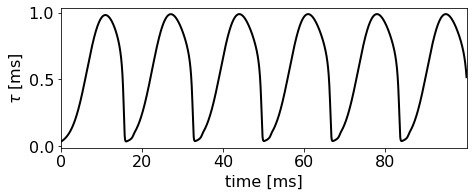

In [5]:
obj = HH({"v0": 20.0})
plt.figure(figsize=(7, 3))

tspan = np.arange(0, 100.0, 0.01)
data = obj.simulate(tspan)
m = data['m']
n = data['n']
h = data['h']

tau=1/(obj.g_k*n**4 + obj.g_na * m ** 3 * h + obj.g_l);


plt.plot(t, tau, lw=2, c="k")
plt.xlim(min(t), max(t))
plt.xlabel("time [ms]")
plt.ylabel(r"$\tau $ [ms]")
plt.tight_layout()

Membrane time constant, as a function of time, for the solution of the classical Hodgkin-Huxley neuron shown in Fig. 7.1.
[`TAU_M_FOR_HH`]

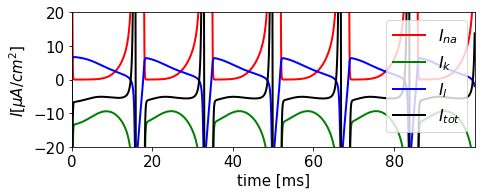

In [6]:
obj = HH({"v0": 20.0})

plt.figure(figsize=(7, 3))

tspan = np.arange(0, 100, 0.01)
data = obj.simulate(tspan)
v = data['v']
m = data['m']
n = data['n']
h = data['h']

I_na = obj.g_na * m ** 3 * h * (obj.v_na - v)
I_k = obj.g_k * n ** 4 * (obj.v_k - v)
I_l=obj.g_l*(obj.v_l-v)
I_tot  = I_k + I_na + I_l

plt.plot(t, I_na, lw=2, c="r", label=r"$I_{na}$")
plt.plot(t, I_k, lw=2, c="g", label=r"$I_{k}$")
plt.plot(t, I_l, lw=2, c="b", label=r"$I_{l}$")
plt.plot(t, I_tot, lw=2, c='k', label=r"$I_{tot}$")

plt.legend()
plt.xlim(min(t), max(t))
plt.ylim(-20, 20)
plt.xlabel("time [ms]", fontsize=15)
plt.ylabel(r"$I [\mu A/cm^2]$", fontsize=15)
plt.tight_layout()
plt.tick_params(labelsize=15)

Sodium current (red), potassium current (green), leak current
(blue), and their sum (black) for the solution of the classical Hodgkin-Huxley neuron showninFig. 7.1.
[`SUBTHR_FOR_HH`]

In [7]:
obj = LIF()
obj()

Linear Integrate-and-Fire (LIF) Model


{'c': 1.0, 'tau_m': 10.0, 't_end': 100.0, 'i_ext': 0.11, 'v0': 0.0, 'dt': 0.01}

In [10]:
data = obj.simulate(tspan=np.arange(0, 100, 0.01))
data.keys()

dict_keys(['t', 'v'])

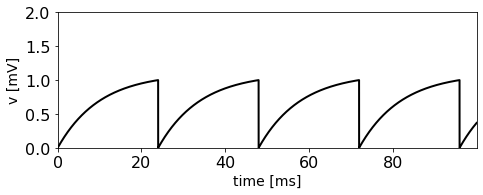

In [12]:
t = data['t']
v = data['v']

plt.figure(figsize=(7, 3))
plt.xlabel("time [ms]", fontsize=14)
plt.ylabel("v [mV]", fontsize=14)
plt.ylim([0, 2])
plt.xlim(0, max(t))
plt.tight_layout()
plt.plot(t, v, lw=2, c="k");


Voltage trace of a normalized LIF neuron with $\tau_m = 10$ and $I = 0.11$. [`LIF_VOLTAGE_TRACE`]

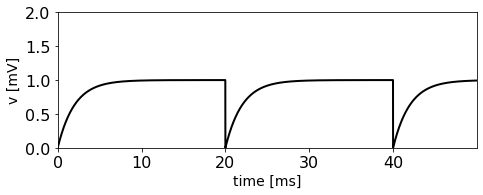

In [16]:
tau_m = 2.0
i_ext = 1 / (1 - np.exp(-20.0 / tau_m)) / tau_m

obj = LIF({"v0": 0.0, "tau_m": 2.0, "i_ext": i_ext})
data = obj.simulate(tspan=np.arange(0, 50, 0.01))
t = data['t']
v = data['v']
plt.figure(figsize=(7, 3))
plt.xlabel("time [ms]", fontsize=14)
plt.ylabel("v [mV]", fontsize=14)
plt.ylim([0, 2])
plt.xlim(0, max(t))
plt.tight_layout()
plt.plot(t, v, lw=2, c="k");